In [1]:
import numpy as np
import pandas as pd
from scipy import optimize
from scipy.special import erf
from scipy.stats import norm, gamma, ttest_ind, wilcoxon
import math
import warnings
import matplotlib.pyplot as plt
from scipy.special import erf
warnings.simplefilter(action='ignore')
np.set_printoptions(suppress=True, formatter={'float_kind':'{:0.5f}'.format})
#from MarketMix_HMC_1g_May_2021 import MarketMixModel
# from MaxLikelihood_1g_May_2021 import LK_MLE

[0.43106 0.48402 0.46310 0.20553 0.92392 0.94270 0.42352]


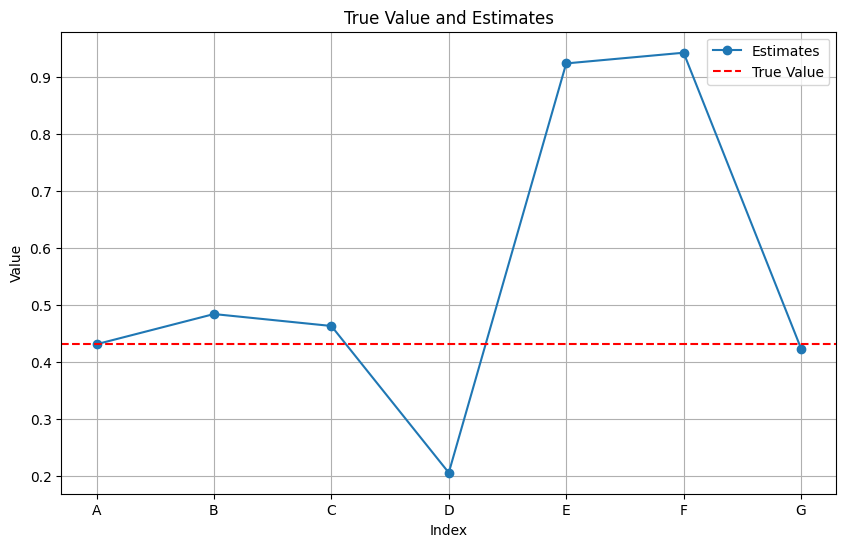

In [2]:
true_value = np.random.uniform(0, 1)
estimates = np.random.uniform(0, 1, 6)
numbers = np.concatenate(([true_value], estimates))
print(numbers)
plt.figure(figsize=(10, 6))
plt.plot(numbers, 'o-', label='Estimates')
plt.axhline(y=true_value, color='r', linestyle='--', label='True Value')
x_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
plt.xticks(ticks=range(len(x_labels)), labels=x_labels)
plt.title('True Value and Estimates')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()



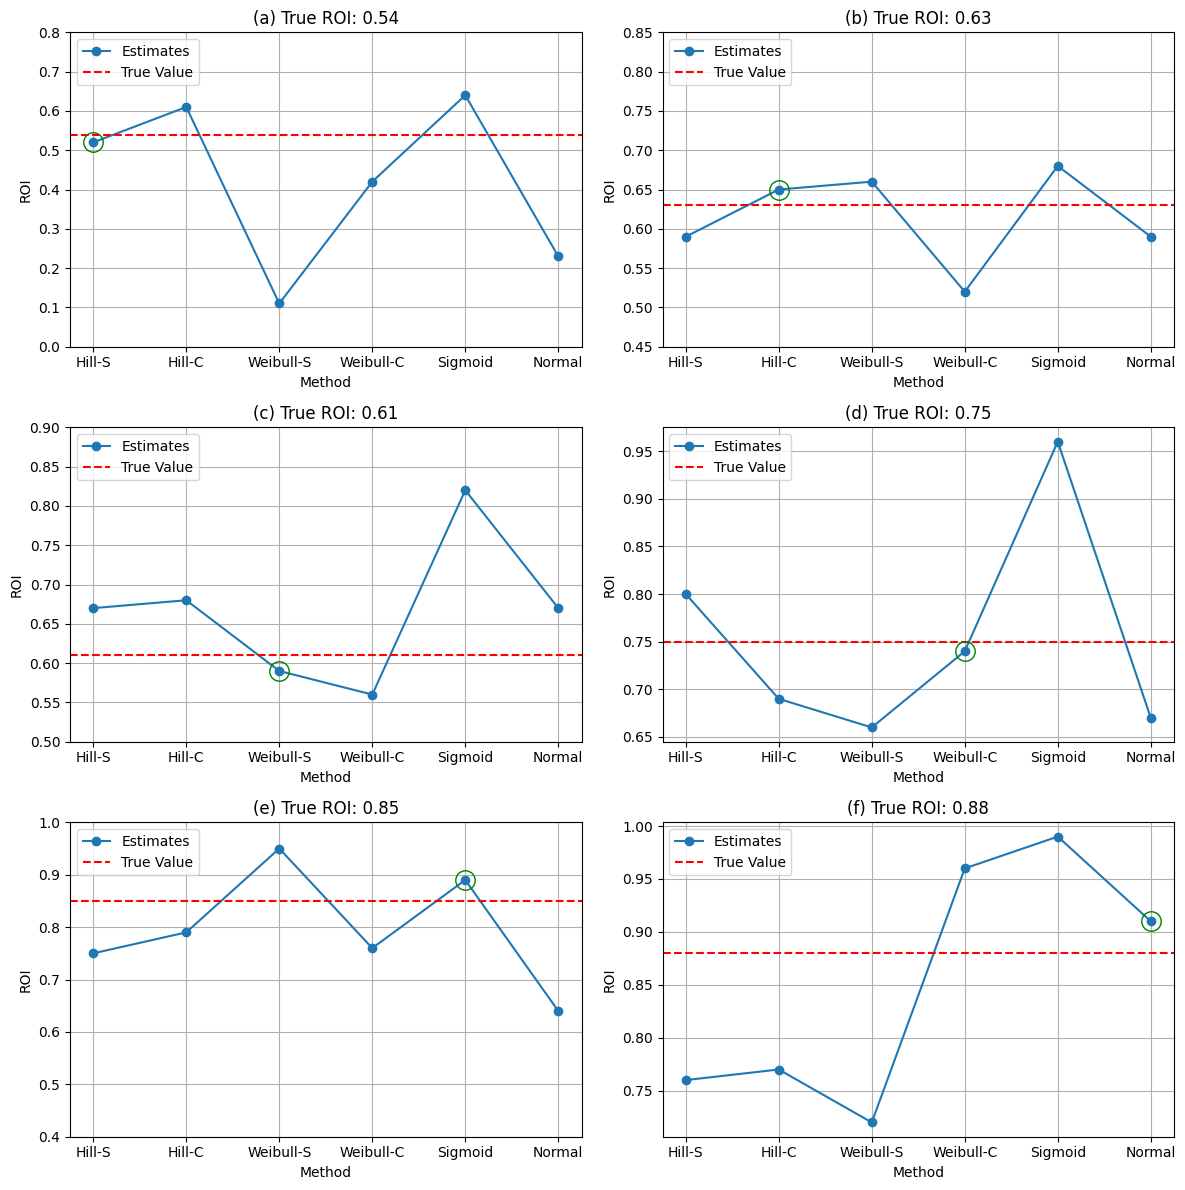

In [4]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for i in range(0, 6, 1):
    #true_value = np.random.uniform(0, 1)
    #estimates = np.random.uniform(0, 1, 6)
    if i == 0:
        true_value = 0.54
        estimates = np.array([0.52, 0.61, 0.11,0.42, 0.64, 0.23])
    elif i == 1:
        true_value = 0.63
        estimates = np.array([0.59, 0.65, 0.66,0.52, 0.68, 0.59])
    elif i == 2:
        true_value = 0.61
        estimates = np.array([0.67, 0.68, 0.59, 0.56, 0.82, 0.67])
    elif i == 3:
        true_value = 0.75
        estimates = np.array([0.80, 0.69, 0.66, 0.74, 0.96, 0.67])
    elif i == 4:
        true_value = 0.85
        estimates = np.array([0.75, 0.79, 0.95, 0.76, 0.89, 0.64])  
    elif i == 5:
        true_value = 0.88
        estimates = np.array([0.76, 0.77, 0.72, 0.96, 0.99, 0.91])
    # numbers = np.concatenate(([true_value], estimates))
    #print(i)
    ax = axs[i // 2, i % 2]
    #print(ax)
    x_labels = ['Hill-S', 'Hill-C', 'Weibull-S', 'Weibull-C', 'Sigmoid', 'Normal']
    ax.plot(estimates, 'o-', label='Estimates')
    ax.axhline(y=true_value, color='r', linestyle='--', label='True Value')
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels)
    ax.set_xlabel('Method')
    ax.set_ylabel('ROI')
    if i == 0:
        ax.set_title(f'(a) True ROI: {true_value}')
        ax.set_ylim(0, 0.8)
        ax.legend(loc = 'upper left')
        # I want to circle the first estimate in the plot
        # using a big green empty circle
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
    elif i == 1:
        ax.set_title(f'(b) True ROI: {true_value}')
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
        ax.set_ylim(0.45, 0.85)
        ax.legend(loc = 'upper left')
    elif i == 2:
        ax.set_title(f'(c) True ROI: {true_value}')
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
        # ax.plot(0, estimates[0], 'o', color='g', markersize=14, fillstyle='none')
        ax.set_ylim(0.5, 0.9)
        ax.legend(loc = 'upper left')
    elif i == 3:
        ax.set_title(f'(d) True ROI: {true_value}')
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
        ax.legend(loc = 'upper left')
    elif i == 4:
        ax.set_title(f'(e) True ROI: {true_value}')  
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
        ax.set_ylim(0.4, 1)
        ax.legend(loc = 'upper left')
    elif i == 5:
        ax.set_title(f'(f) True ROI: {true_value}')
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
        ax.legend(loc = 'upper left')
    # set ylimit
    #
    #ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

In [5]:
###### Fig 2, visalization of the true value and the estimates for table 2. 

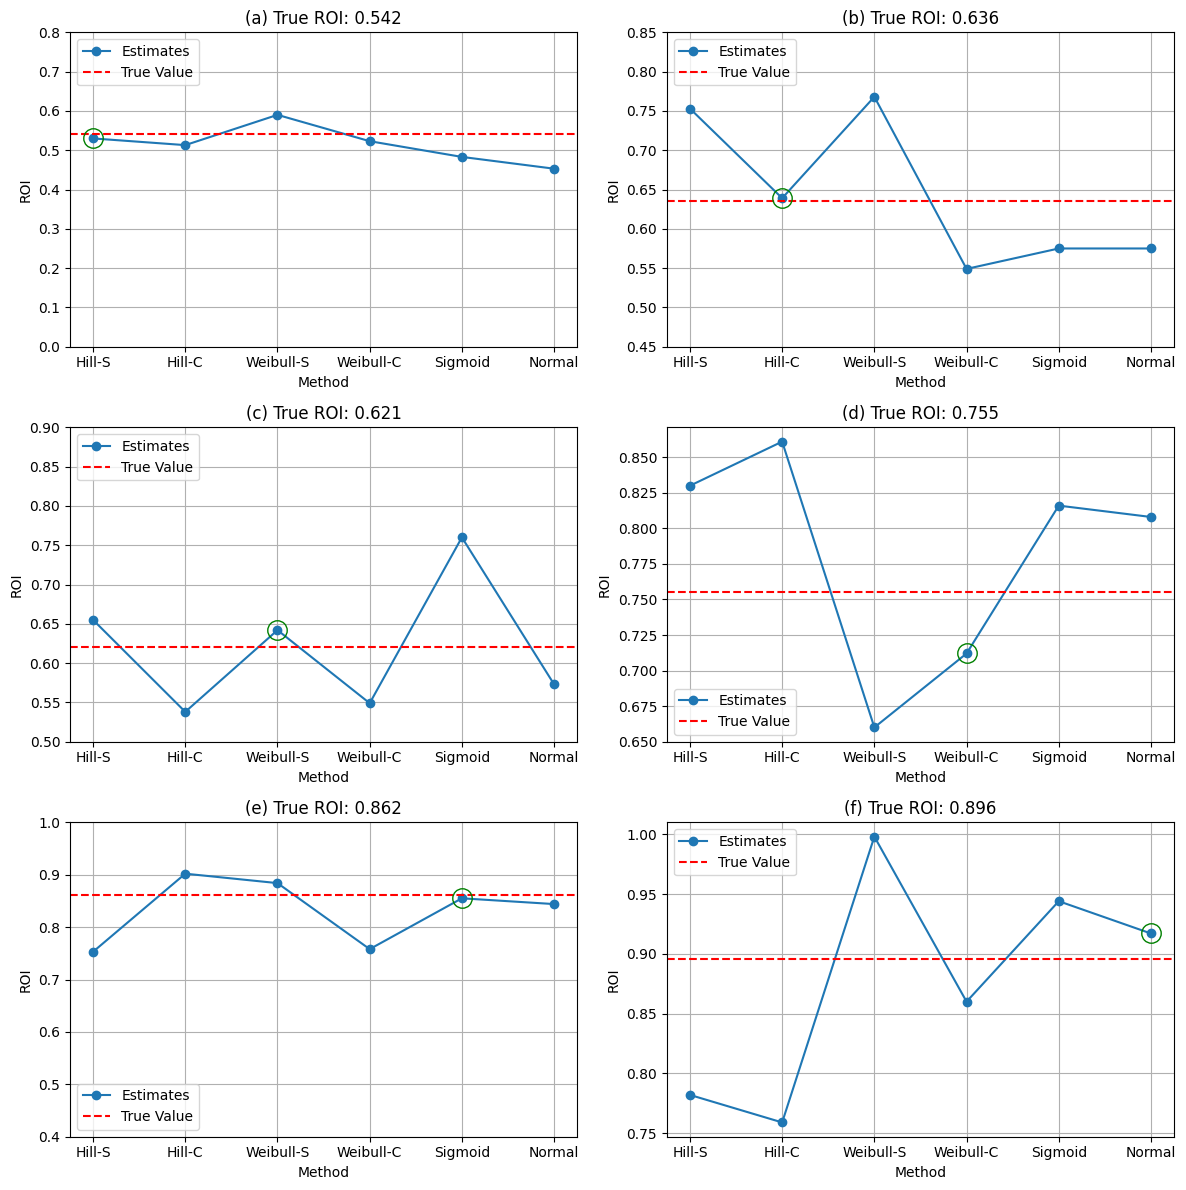

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

for i in range(0, 6, 1):
    #true_value = np.random.uniform(0, 1)
    #estimates = np.random.uniform(0, 1, 6)
    if i == 0:
        true_value = 0.542
        estimates = np.array([0.53, 0.513, 0.590, 0.523, 0.483, 0.453])
    elif i == 1:
        true_value = 0.636
        estimates = np.array([0.753, 0.639, 0.768, 0.549, 0.575, 0.575])
    elif i == 2:
        true_value = 0.621
        estimates = np.array([0.655, 0.538, 0.642, 0.549, 0.760, 0.573])
    elif i == 3:
        true_value = 0.755
        estimates = np.array([0.830, 0.861, 0.660, 0.712, 0.816, 0.808])
    elif i == 4:
        true_value = 0.862
        estimates = np.array([0.753, 0.902, 0.884, 0.758, 0.855, 0.844])  
    elif i == 5:
        true_value = 0.896
        estimates = np.array([0.782, 0.759, 0.998, 0.860, 0.944, 0.917])
    # numbers = np.concatenate(([true_value], estimates))
    #print(i)
    ax = axs[i // 2, i % 2]
    #print(ax)
    x_labels = ['Hill-S', 'Hill-C', 'Weibull-S', 'Weibull-C', 'Sigmoid', 'Normal']
    ax.plot(estimates, 'o-', label='Estimates')
    ax.axhline(y=true_value, color='r', linestyle='--', label='True Value')
    ax.set_xticks(range(len(x_labels)))
    ax.set_xticklabels(x_labels)
    ax.set_xlabel('Method')
    ax.set_ylabel('ROI')
    if i == 0:
        ax.set_title(f'(a) True ROI: {true_value}')
        ax.set_ylim(0, 0.8)
        ax.legend(loc = 'upper left')
        # I want to circle the first estimate in the plot
        # using a big green empty circle
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
    elif i == 1:
        ax.set_title(f'(b) True ROI: {true_value}')
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
        ax.set_ylim(0.45, 0.85)
        ax.legend(loc = 'upper left')
    elif i == 2:
        ax.set_title(f'(c) True ROI: {true_value}')
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
        # ax.plot(0, estimates[0], 'o', color='g', markersize=14, fillstyle='none')
        ax.set_ylim(0.5, 0.9)
        ax.legend(loc = 'upper left')
    elif i == 3:
        ax.set_title(f'(d) True ROI: {true_value}')
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
        ax.legend(loc = 'lower left')
    elif i == 4:
        ax.set_title(f'(e) True ROI: {true_value}')  
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
        ax.set_ylim(0.4, 1)
        ax.legend(loc = 'lower left')
    elif i == 5:
        ax.set_title(f'(f) True ROI: {true_value}')
        ax.plot(i, estimates[i], 'o', color='g', markersize=14, fillstyle='none')
        ax.legend(loc = 'upper left')
    # set ylimit
    #
    #ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()